# **Curso de Decision Trees y Random Forest con Python y scikit-learn**

# **Decision Trees**

## **Ejemplo general**

In [1]:
# Importamos las librerías que vamos a utilizar:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Importación, Limpieza y Transformación del Dataset**

In [2]:
# Importamos el conjunto de datos del titanic:
df = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')
df.head()

Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0                        0                        0   8.0500

In [3]:
# Luego, eliminamos las variables que no nos interesan:
df = df.drop(["Name", "Fare"], axis=1)
df.head()

Survived  Pclass     Sex   Age  Siblings/Spouses Aboard  \
0         0       3    male  22.0                        1   
1         1       1  female  38.0                        1   
2         1       3  female  26.0                        0   
3         1       1  female  35.0                        1   
4         0       3    male  35.0                        0   

   Parents/Children Aboard  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0

In [4]:
# Luego, renombramos las columnas con las que vamos a trabajar:
df.columns = ["Sobrevivio", "Clase", "Sexo", "Edad", "Hermanos", "Hijos"]
df.head()

Sobrevivio  Clase    Sexo  Edad  Hermanos  Hijos
0           0      3    male  22.0         1      0
1           1      1  female  38.0         1      0
2           1      3  female  26.0         0      0
3           1      1  female  35.0         1      0
4           0      3    male  35.0         0      0

In [5]:
# Ahora, 
df.shape

(887, 6)

In [6]:
# A continuación, vemos los tipos de variables con las que contamos
df.dtypes

Sobrevivio      int64
Clase           int64
Sexo           object
Edad          float64
Hermanos        int64
Hijos           int64
dtype: object

In [7]:
# Ahora, convertimos la variable "Sexo" en una variable numérica binaria:
df = pd.get_dummies(df, columns=["Sexo"], drop_first=True)
# Esta función nos permite crear variables dummies a partir de una variable categórica.
# Es este caso, convierte la variable "Sexo" en una varuable llamada "Sexo_male", la cual es
# 1 si el pasajero es hombre y 0 si es mujer.

# Luego, como se le cambión el nombre a la variable "Sexo", podemos volver a ponérselo:
df.rename(columns={"Sexo_male": "Sexo"}, inplace=True)
df.head()

Sobrevivio  Clase  Edad  Hermanos  Hijos   Sexo
0           0      3  22.0         1      0   True
1           1      1  38.0         1      0  False
2           1      3  26.0         0      0  False
3           1      1  35.0         1      0  False
4           0      3  35.0         0      0   True

In [8]:
# Luego, ordenamos las columnas de la siguiente manera, para facilitar la lectura:
df = df[["Sobrevivio", "Clase", "Sexo", "Edad", "Hermanos", "Hijos"]]
df.head()

Sobrevivio  Clase   Sexo  Edad  Hermanos  Hijos
0           0      3   True  22.0         1      0
1           1      1  False  38.0         1      0
2           1      3  False  26.0         0      0
3           1      1  False  35.0         1      0
4           0      3   True  35.0         0      0

### **Entrenamiento  del Modelo**

In [9]:
# Separamos las variables independientes de la variable dependiente:

# Variables independientes:
X = df.drop("Sobrevivio", axis=1)

# Variable dependiente:
y = df["Sobrevivio"]

In [10]:
# Importamos la función train_test_split de sklearn:
from sklearn.model_selection import train_test_split

# Separamos los datos en conjuntos de entrenamiento y prueba (30%-70%):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# El parámetro random_state nos permite fijar la semilla para que los resultados sean reproducibles.

In [11]:
# Luego, importamos la clase DecisionTreeClassifier de sklearn:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)
# El parámetro max_depth nos permite fijar la profundidad máxima del árbol de decisión.
# El parámetro random_state nos permite fijar la semilla para que los resultados sean reproducibles.

In [12]:
# Luego, entrenamos el modelo:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

### **Evaluación del Modelo**

In [13]:
# Calculamos las predicciones del modelo en el conjunto de entrenamiento:
y_test_pred = tree.predict(X_test)

# Calculamos las predicciones del modelo en el conjunto de prueba:
y_train_pred = tree.predict(X_train)

In [14]:
# Importamos la función accuracy_score de sklearn:
from sklearn.metrics import accuracy_score

# Calculamos la exactitud del modelo en el conjunto de entrenamiento:
train_acurracy = accuracy_score(y_train, y_train_pred)
test_acurracy = accuracy_score(y_test, y_test_pred)

# Imprimimos los resultados:
print("Acurracy en Train: ", train_acurracy)
print("Acurracy en Test: ", test_acurracy)

Acurracy en Train:  0.8064516129032258
Acurracy en Test:  0.7378277153558053


C:\Users\eespitia\AppData\Local\Temp\ipykernel_9396\2804265544.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


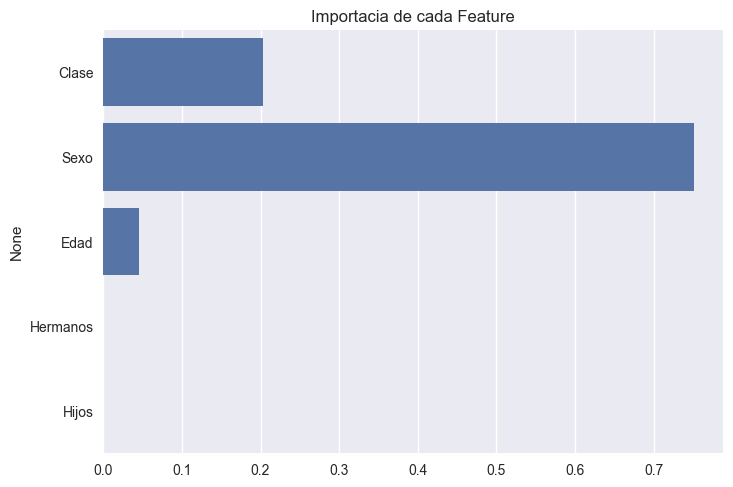

In [15]:
# Verificamos el "Feature Importance" del modelo:

importances = tree.feature_importances_
columns = X.columns

plt.style.use("seaborn")
sns.barplot(x=importances, y=columns, saturation=0.8, orient='h')
plt.title("Importacia de cada Feature")
plt.show()

## **Proyecto Práctico**

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn

Para este proyecto, haremos uso de un dataset llamado "Car Evaluation Data Set", el cual se encuentra en el siguiente link de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set

In [17]:
# Una vez desgargado el dataset, procedemos a importarlo
df = pd.read_csv("C:/Users/eespitia/Documents/VSCode Notebooks/Cursos de Platzi/Datasets/car_evaluation.csv", header=None)
df.head()

# Las columnas de nuestro dataset son: buying price, maintenance price, number of doors, capacity, size of luggage boot, safety, and the acceptability.

0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc

In [18]:
# Ahora, procedemos a renombrar las columnas:
df.columns = ["Precio", "Mantenimiento", "Puertas", "Capacidad", "Tamaño", "Seguridad", "Aceptabilidad"]
df.head()

Precio Mantenimiento Puertas Capacidad Tamaño Seguridad Aceptabilidad
0  vhigh         vhigh       2         2  small       low         unacc
1  vhigh         vhigh       2         2  small       med         unacc
2  vhigh         vhigh       2         2  small      high         unacc
3  vhigh         vhigh       2         2    med       low         unacc
4  vhigh         vhigh       2         2    med       med         unacc

El objetivo de este proyecto es intentar predecir la variable "acceptability".

In [19]:
# Veamos los tipos de variables con las que contamos:
df.dtypes

Precio           object
Mantenimiento    object
Puertas          object
Capacidad        object
Tamaño           object
Seguridad        object
Aceptabilidad    object
dtype: object

In [20]:
# Ahora, realizamos una tabla de frecuencias de la variable "Aceptabilidad":
df["Aceptabilidad"].value_counts()

Aceptabilidad
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [21]:
# Vemos si existen valores nulos en nuestro dataset:
df.isna().sum()

Precio           0
Mantenimiento    0
Puertas          0
Capacidad        0
Tamaño           0
Seguridad        0
Aceptabilidad    0
dtype: int64

In [22]:
# Separamos las variables independientes de la variable dependiente:
X = df.drop("Aceptabilidad", axis=1)
y = df["Aceptabilidad"]

In [23]:
# Importamos la función train_test_split de sklearn:
from sklearn.model_selection import train_test_split

# Separamos los datos en conjuntos de entrenamiento y prueba (30%-70%):
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Veamos el tamaño de cada conjunto:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1209, 6), (519, 6), (1209,), (519,))

### **Definición y entrenamiento del modelo**

In [25]:
# Primero que todo, instalamos la librería category_encoders:
# !pip install category-encoders

In [26]:
# Luego, importamos 
import category_encoders as ce

# Definimos el codificador:
encoder = ce.OrdinalEncoder(cols=X.columns)

In [27]:
# Luego, codificamos las variables independientes:
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [28]:
# Verificamos que las variables independientes hayan sido codificadas:
X_train.head()

Precio  Mantenimiento  Puertas  Capacidad  Tamaño  Seguridad
1178       1              1        1          1       1          1
585        2              2        2          2       2          2
1552       3              1        2          1       3          3
1169       1              1        1          3       1          1
1033       1              2        3          3       1          3

In [29]:
# Importamos la clase DecisionTreeClassifier de sklearn:
from sklearn.tree import DecisionTreeClassifier

# Creamos el modelo:
tree = DecisionTreeClassifier(max_depth=2, random_state=42)

# Entrenamos el modelo:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [30]:
# Luego, calculamos las predicciones del modelo en el conjunto de entrenamiento:
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

### **Matriz de Confusión**

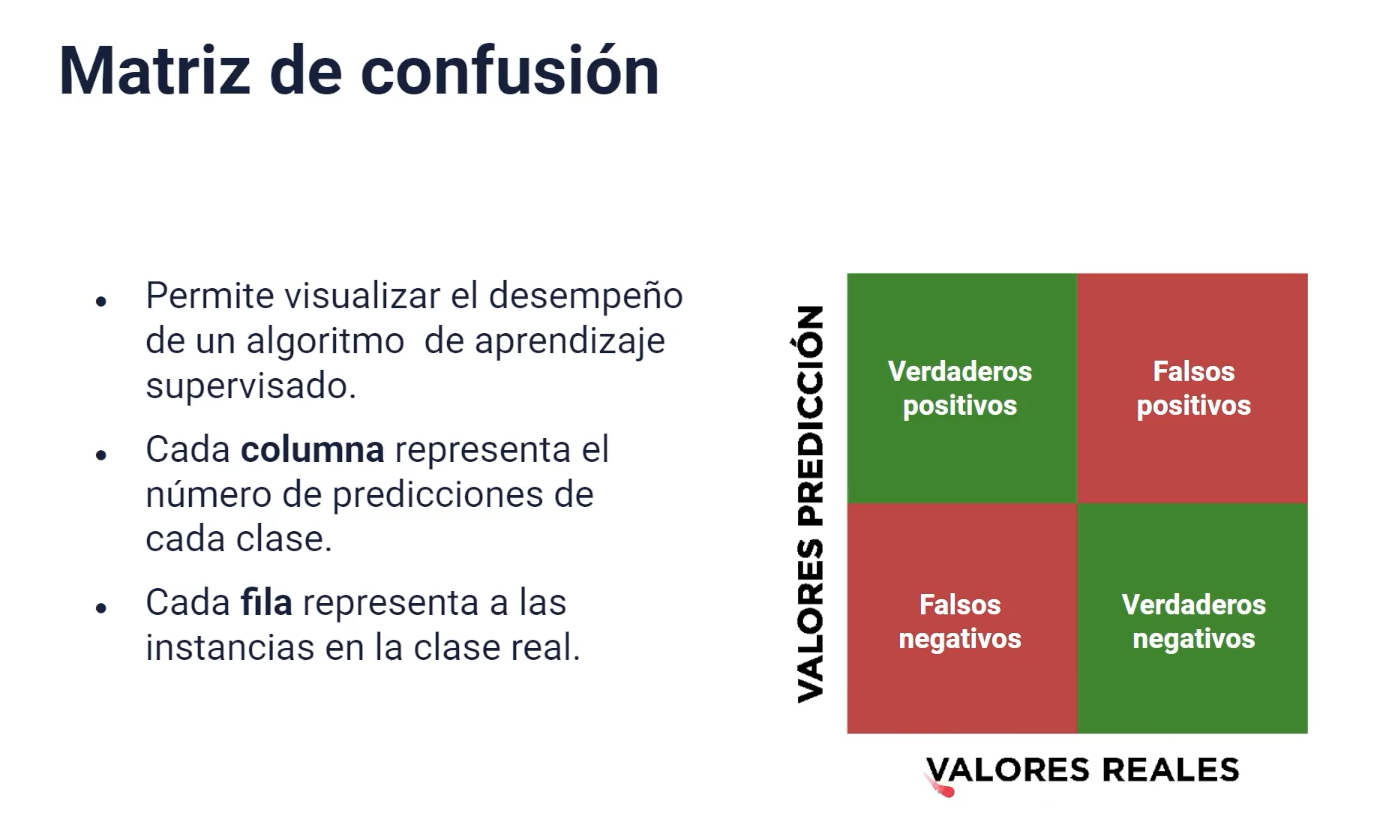

A continuación se presenta la interpretación de lada campo de la matriz de confusión:

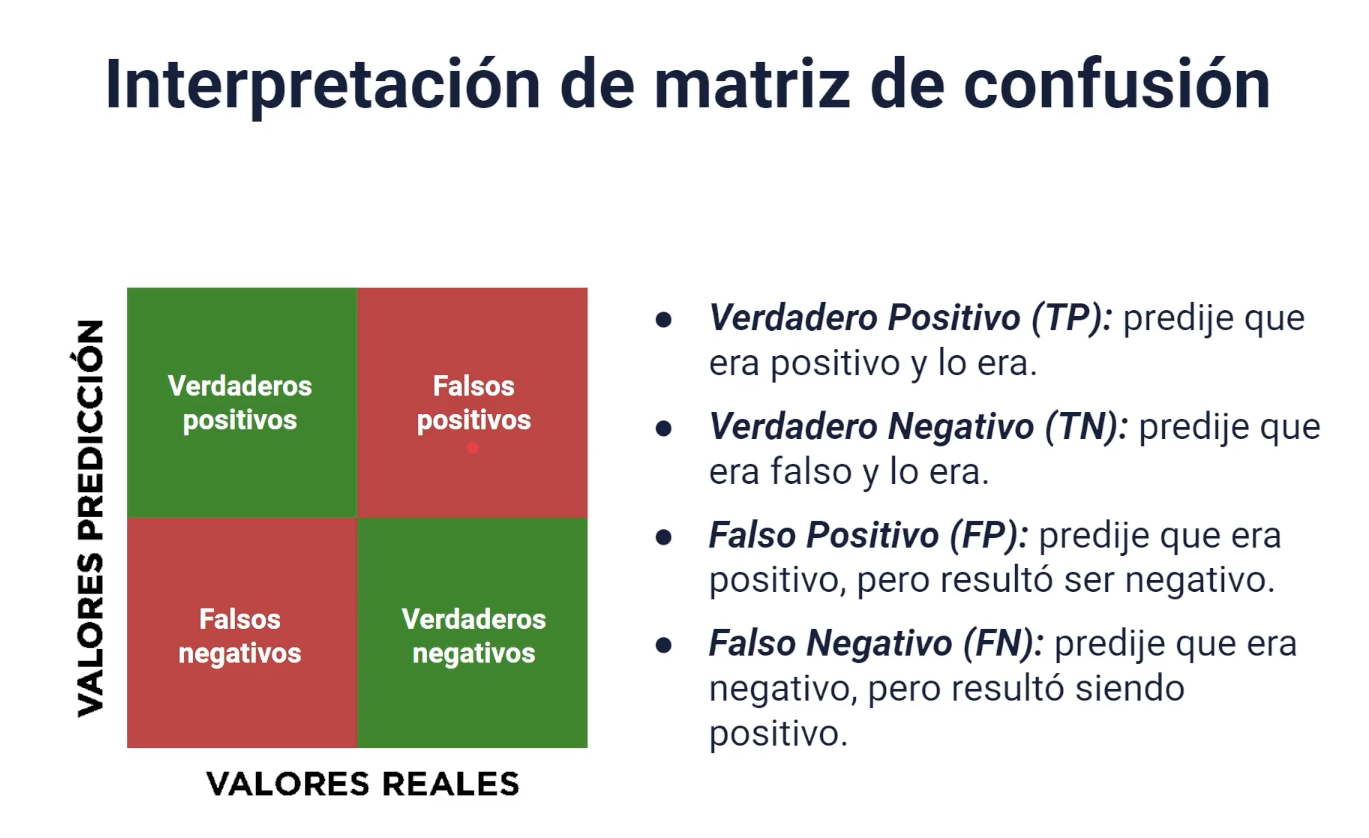

### **Exactitud o Acurracy**

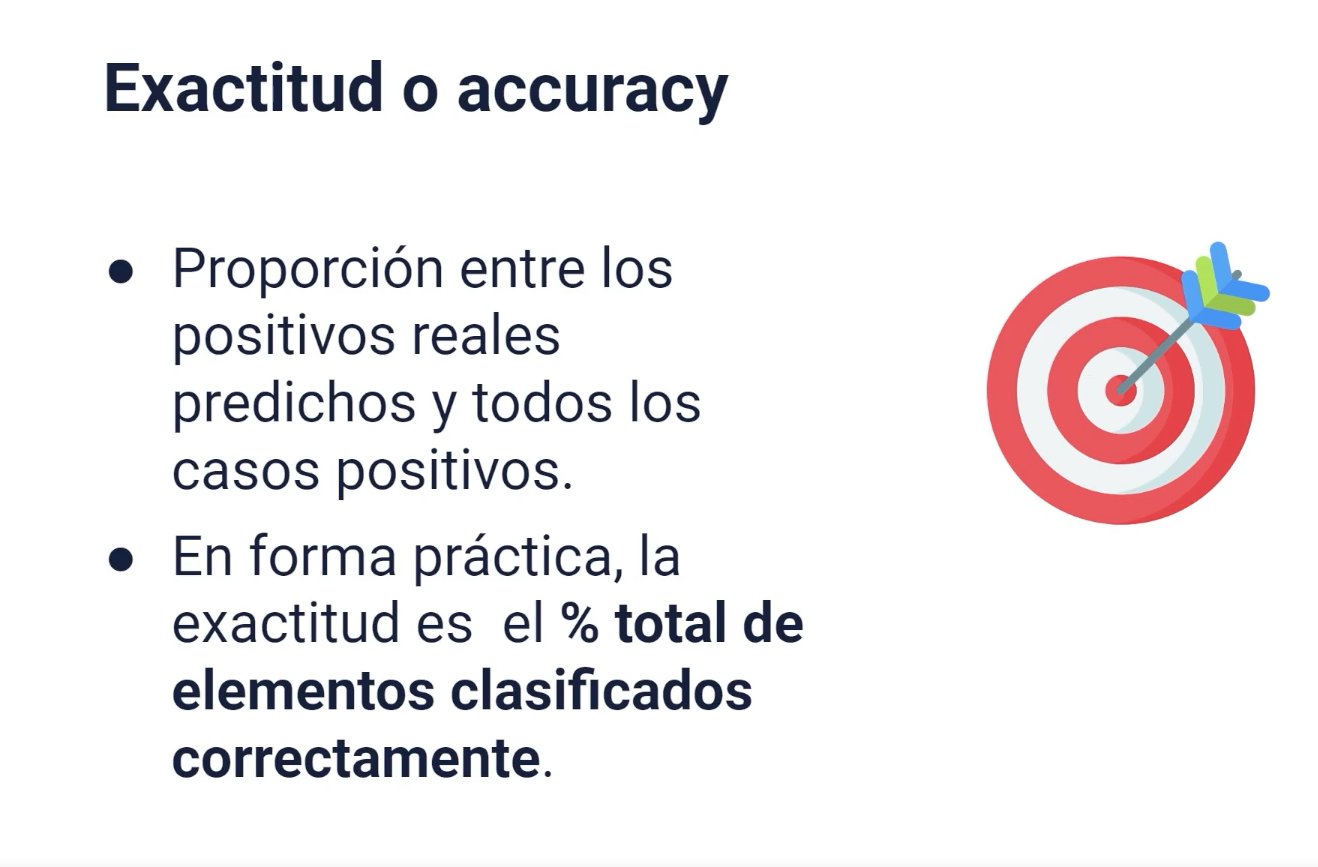

Esta métrica se calcula de la siguiente manera: 

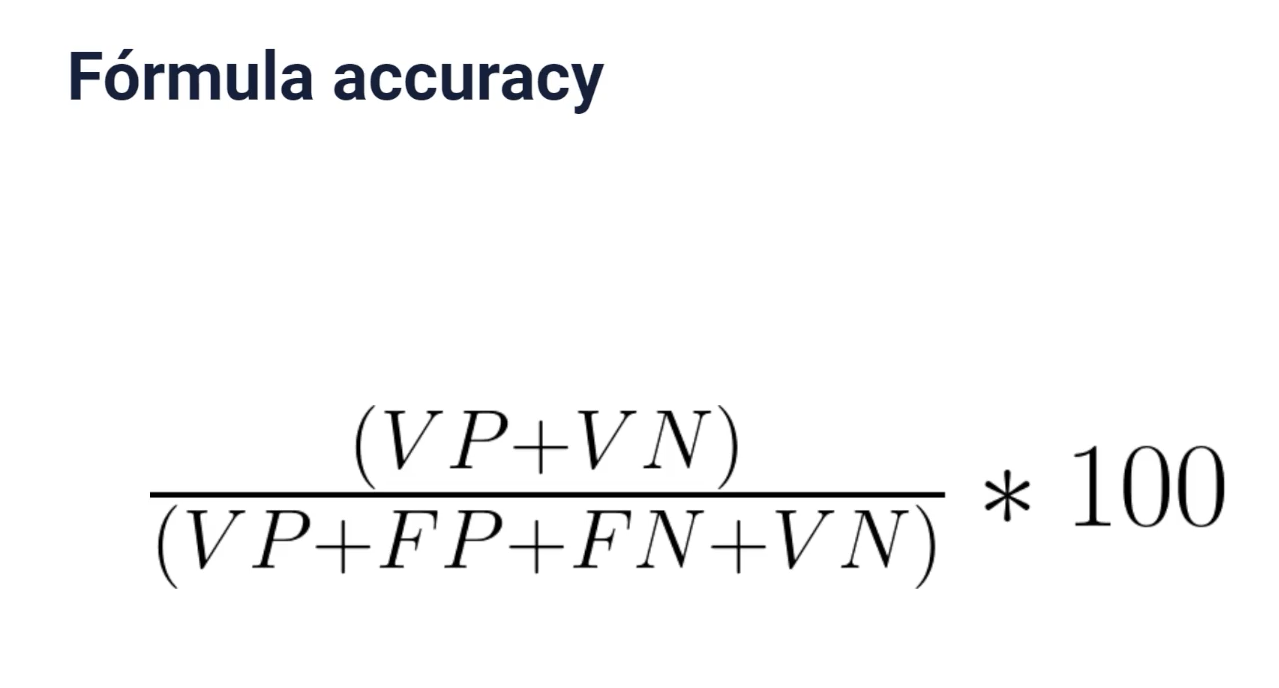


En términos generales, la métrica accuracy es el cociente entre el número de aciertos al predecir y el número de decisiones totales realizadas. En particular, el número de aciertos corresponde a la suma entre los verdaderos positivos y los verdaderos negativos

### **Precisión**

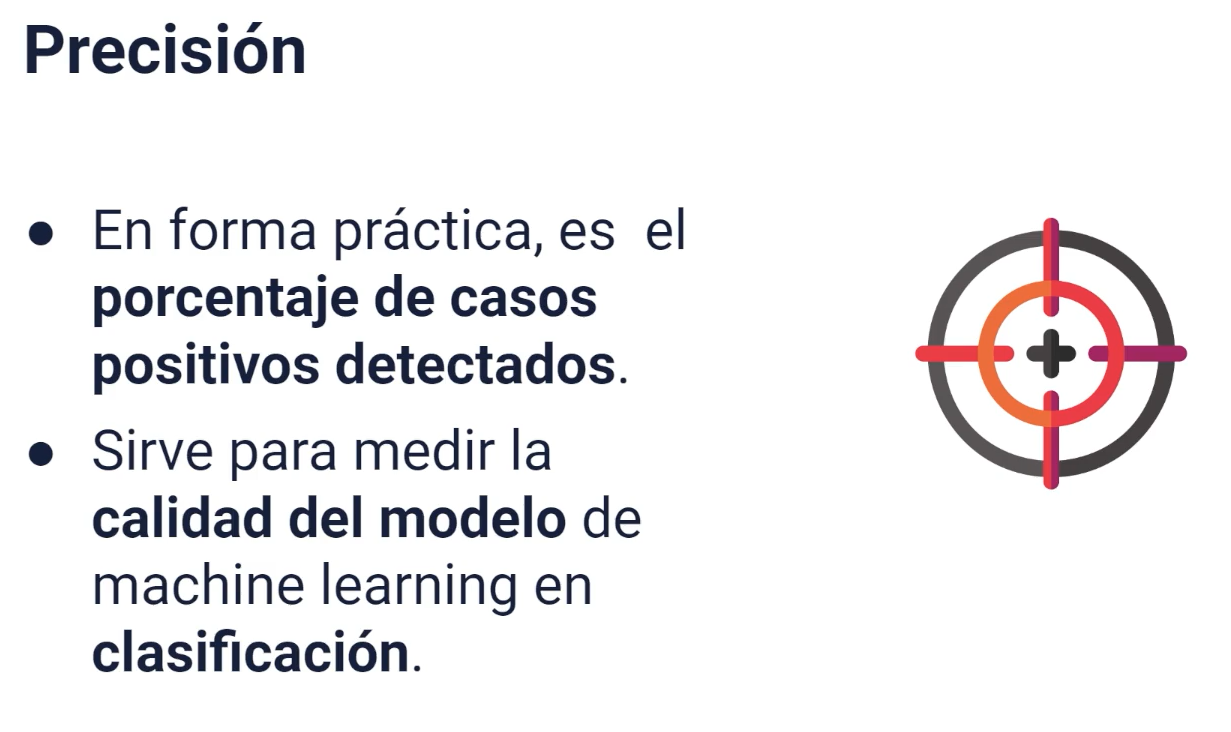

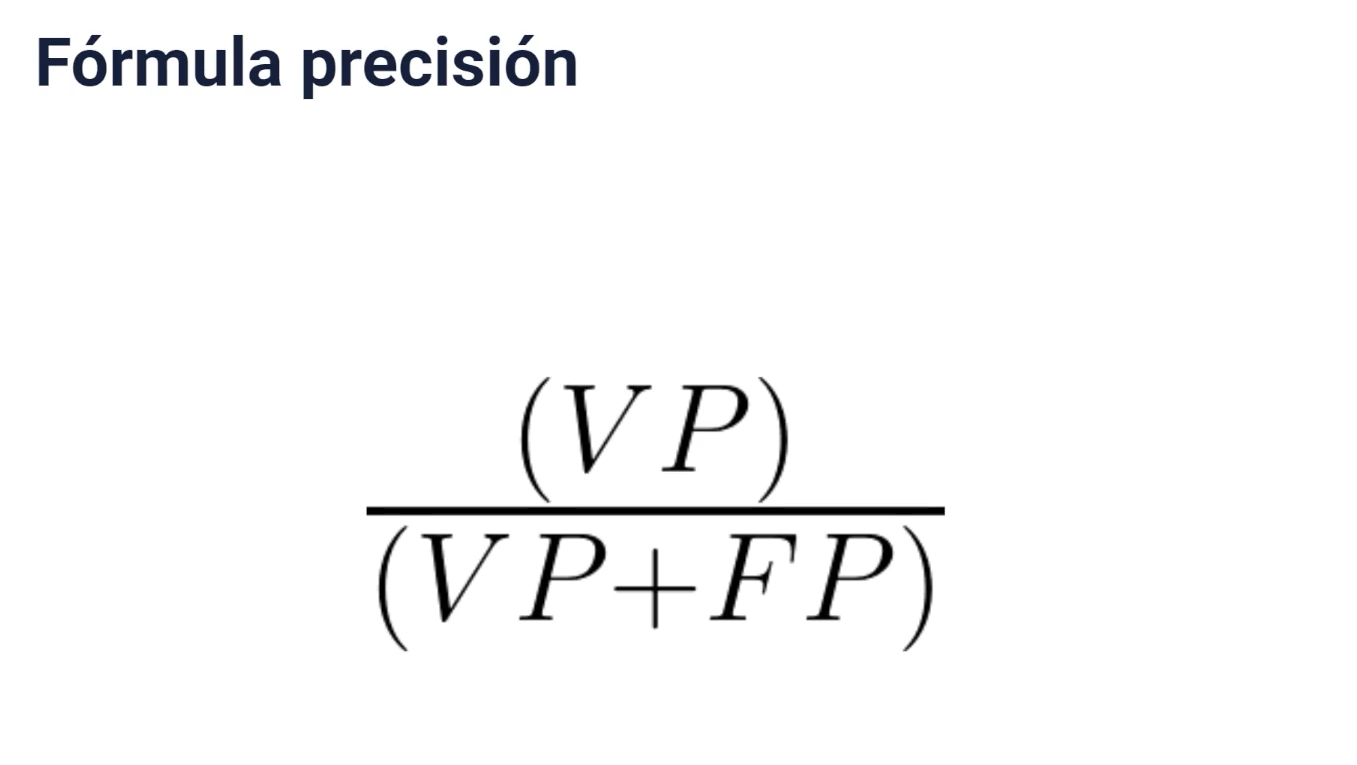

En este caso, no se calcula una métrica en términos de todas las decisiones realizadas (predecir positivos y negativos), sino que se tiene en cuenta únicamente la capacidad del modelo para predecir verdaderos positivos

### **Sensibilidad**

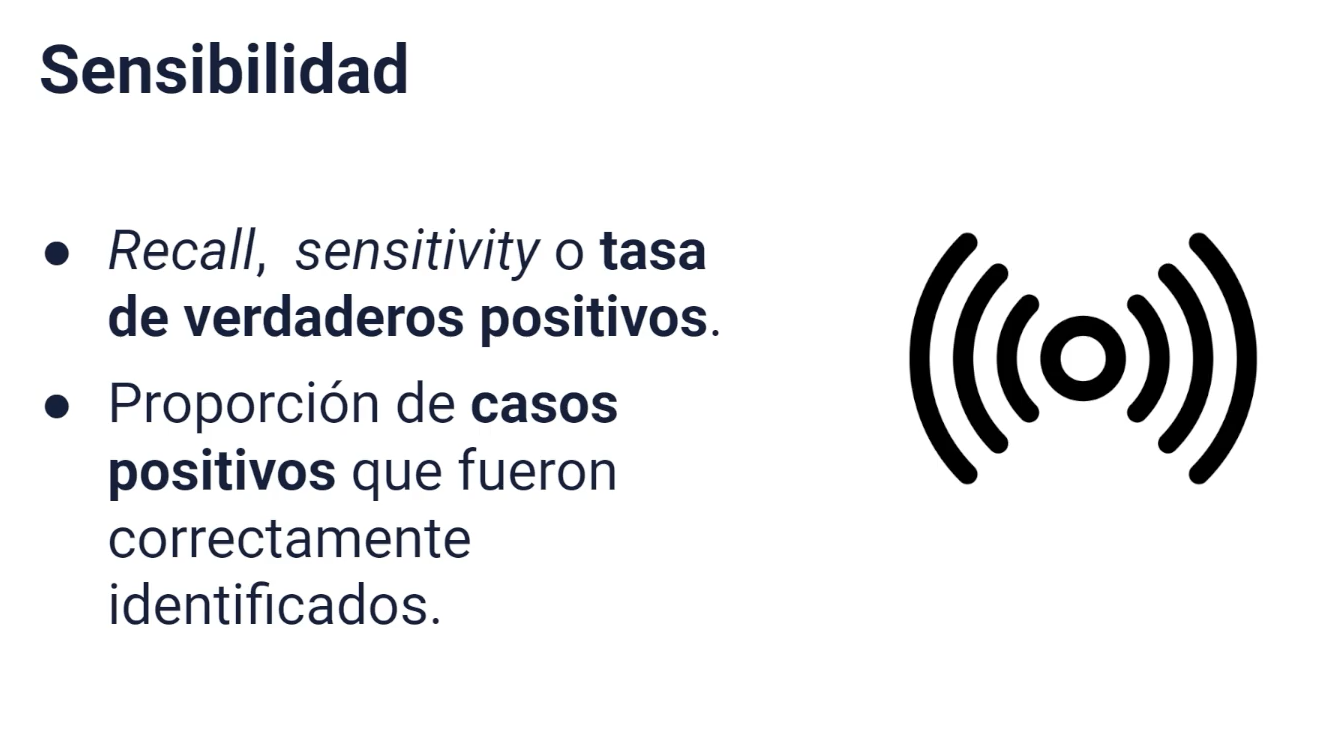

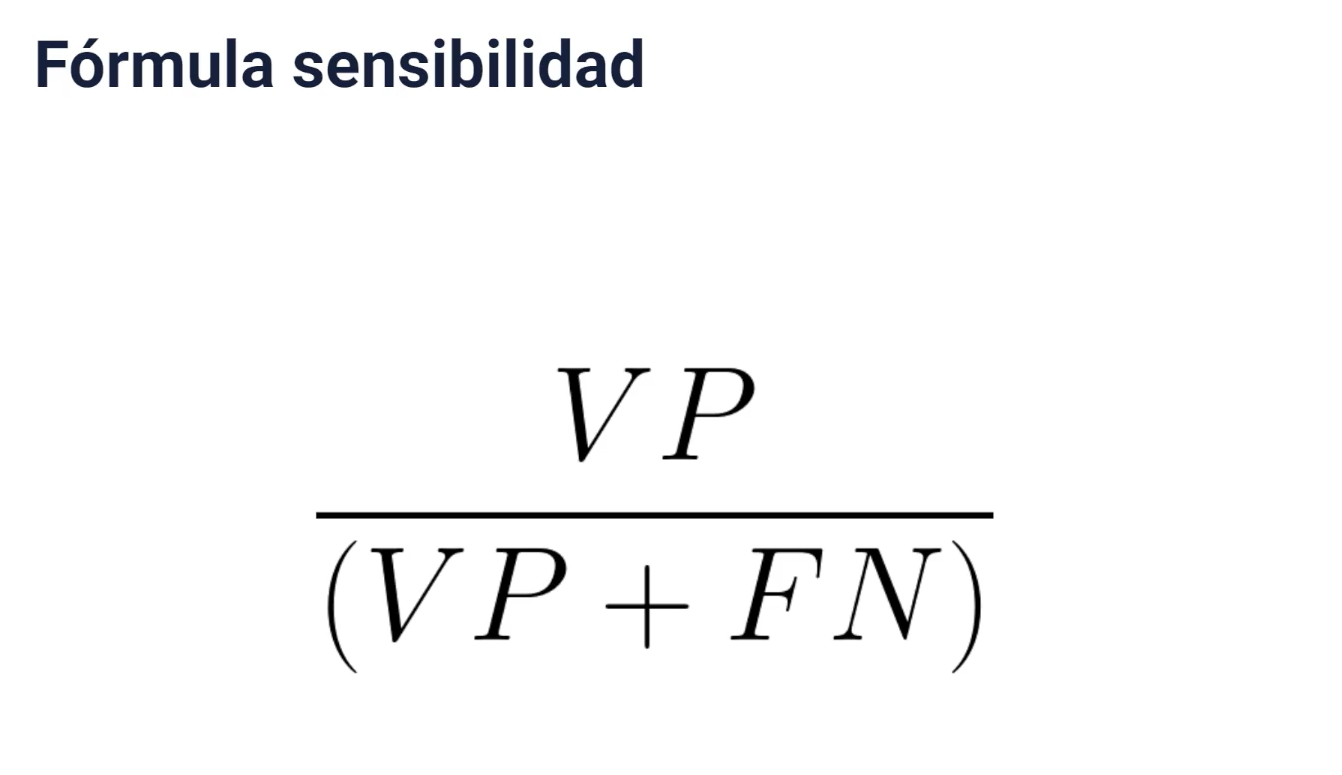

### **Especificidad**

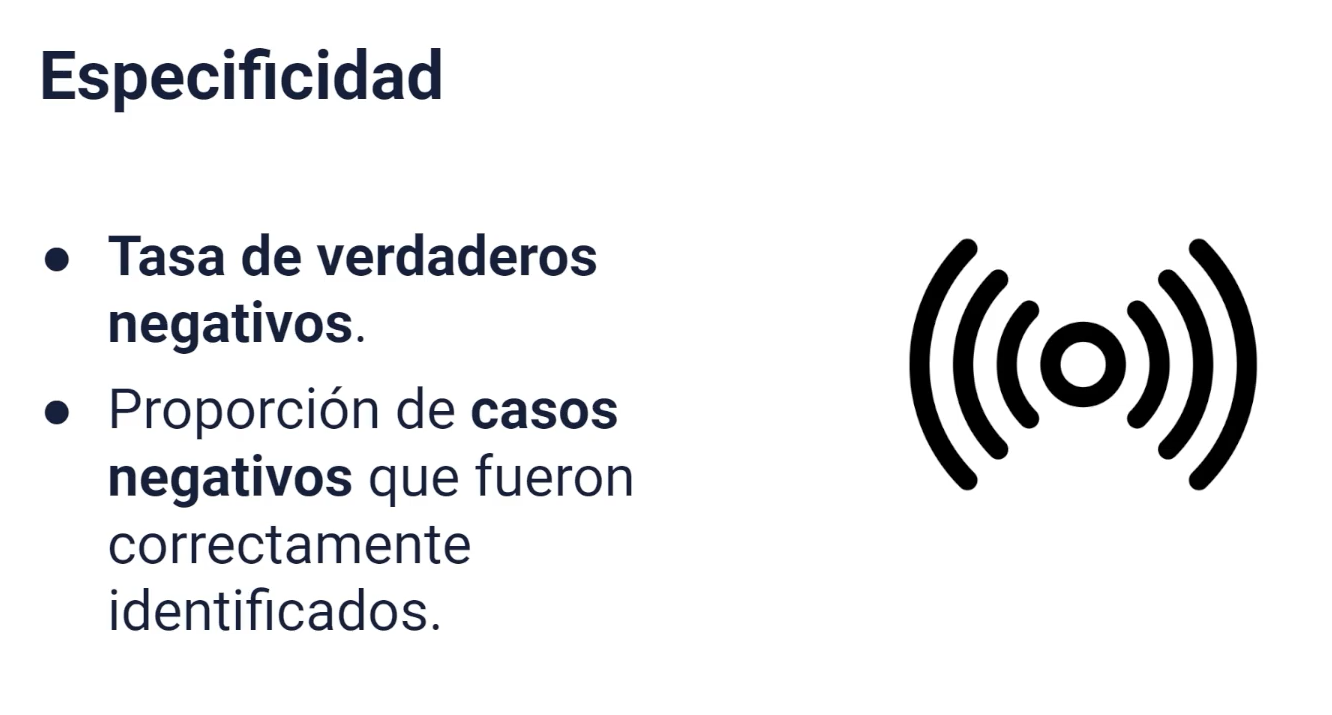

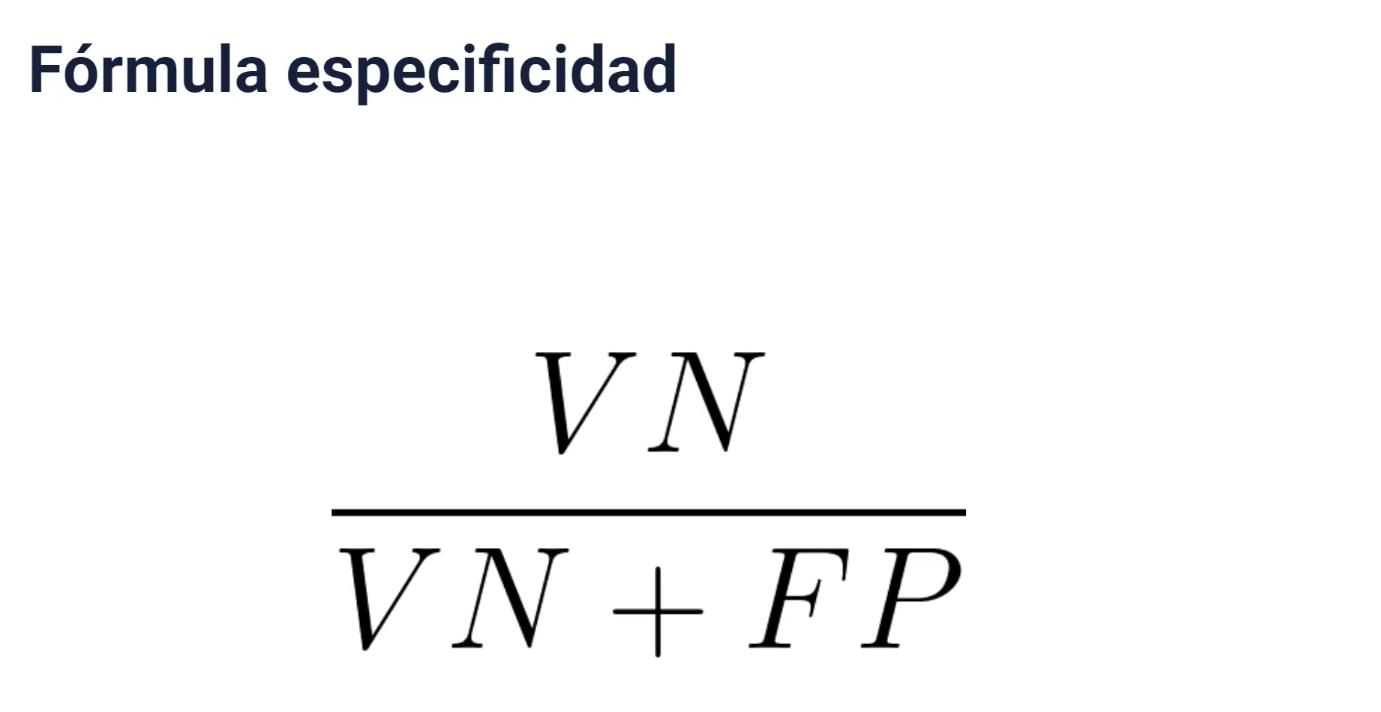

### **F1 - Score**

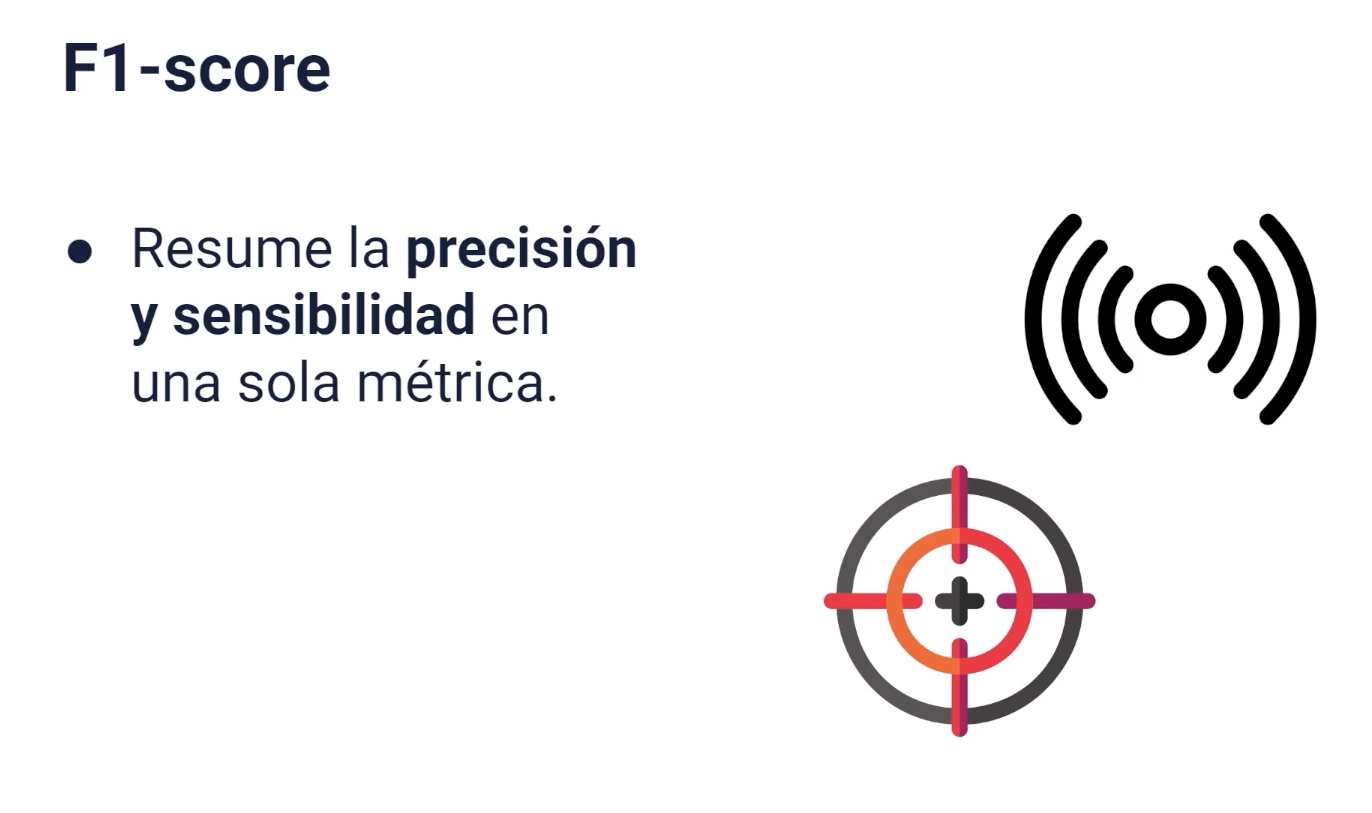

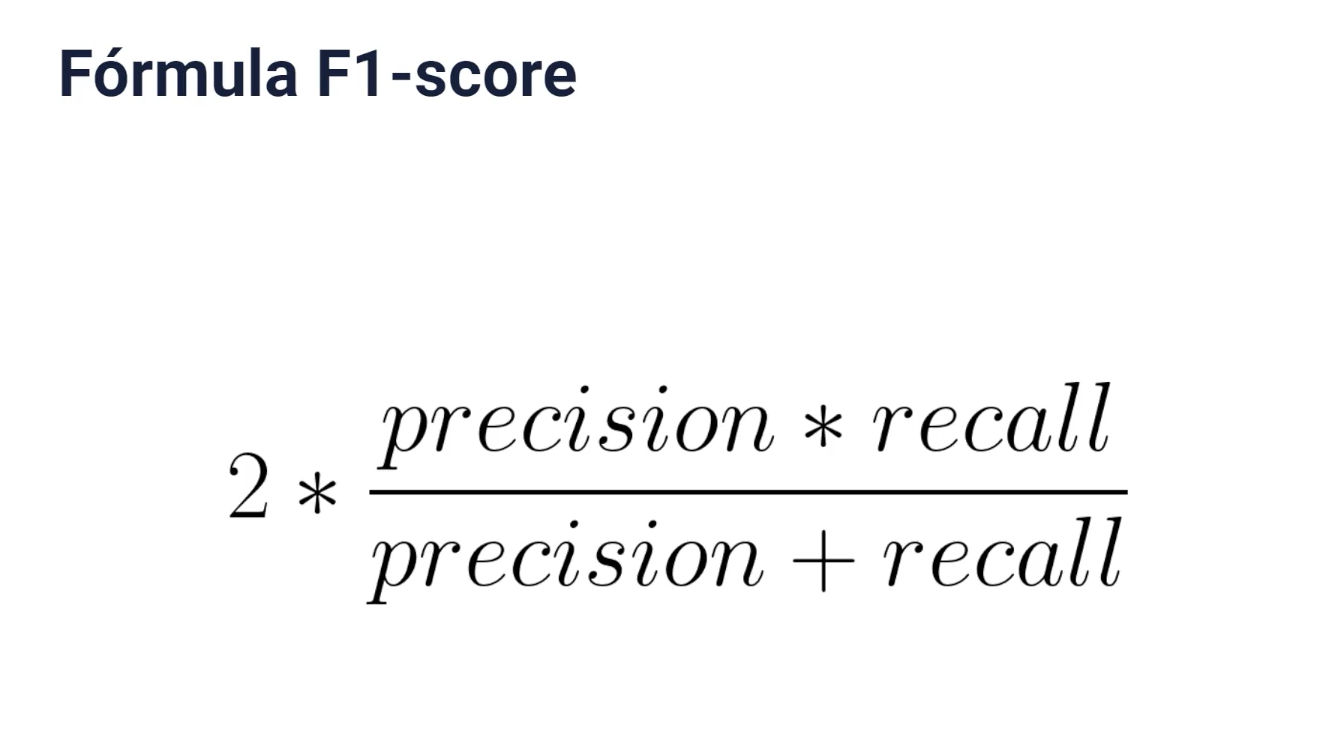

### **Resumen de las métricas:**

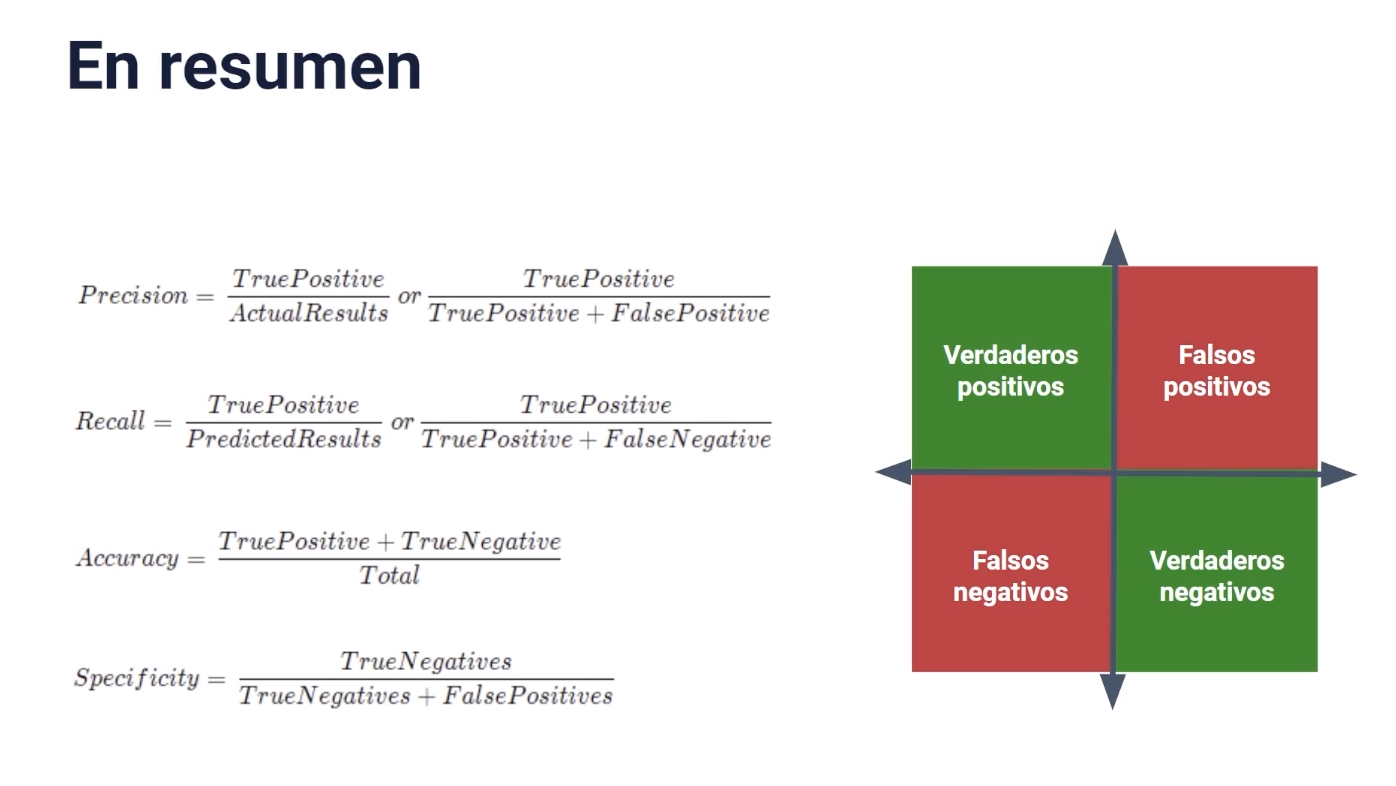

### **Implementación de las métricas en nuestro modelo**

In [31]:
# Primero, importamos la función accuracy_score de sklearn:
from sklearn.metrics import accuracy_score

train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)
test_acurracy_tree = accuracy_score(y_test, y_test_pred_tree)

print("Acurracy en Train: ", train_accuracy_tree)
print("Acurracy en Test: ", test_acurracy_tree)

Acurracy en Train:  0.7733664185277088
Acurracy en Test:  0.7591522157996147


C:\Users\eespitia\AppData\Local\Temp\ipykernel_9396\3591987867.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


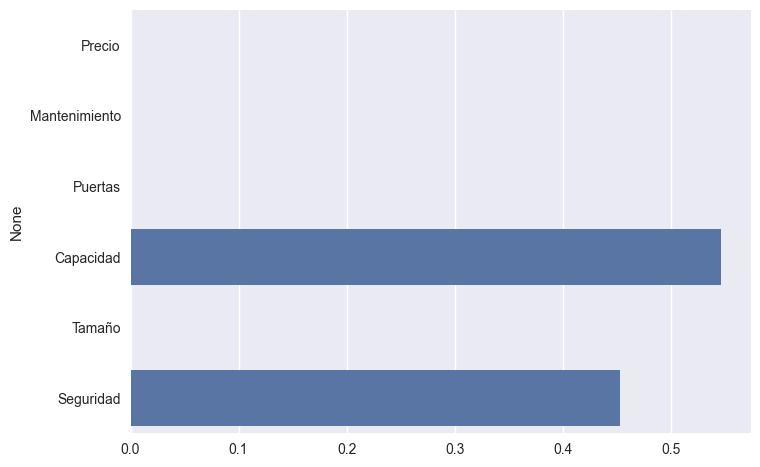

In [32]:
# Verificamos el feature importance del modelo:

importances = tree.feature_importances_
columns = X.columns

plt.style.use("seaborn")
sns.barplot(
    x=importances,
    y=columns,
    orient='h'
)
plt.show()

# **Random Forest**

In [33]:
# Primero que todo, 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Para este ejemplo, haremos uso del dataset "Pima Indians Diabetes Database" el cual se encuentra en Kagle: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [34]:
# Importamos el conjunto de datos:
df = pd.read_csv("C:/Users/eespitia/Documents/VSCode Notebooks/Cursos de Platzi/Datasets/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

### **Descripción de la base de datos**

In [35]:
# Primero que todo, vemos las dimensiones del dataset:
df.shape

(768, 9)

In [36]:
# Vemos los tipos de datos con los que contamos:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [37]:
# Luego, validamos si existen valores nulos en el dataset:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [38]:
# Ahora, vemos las columnas con las que contamos: 
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

C:\Users\eespitia\AppData\Local\Temp\ipykernel_9396\4108489354.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


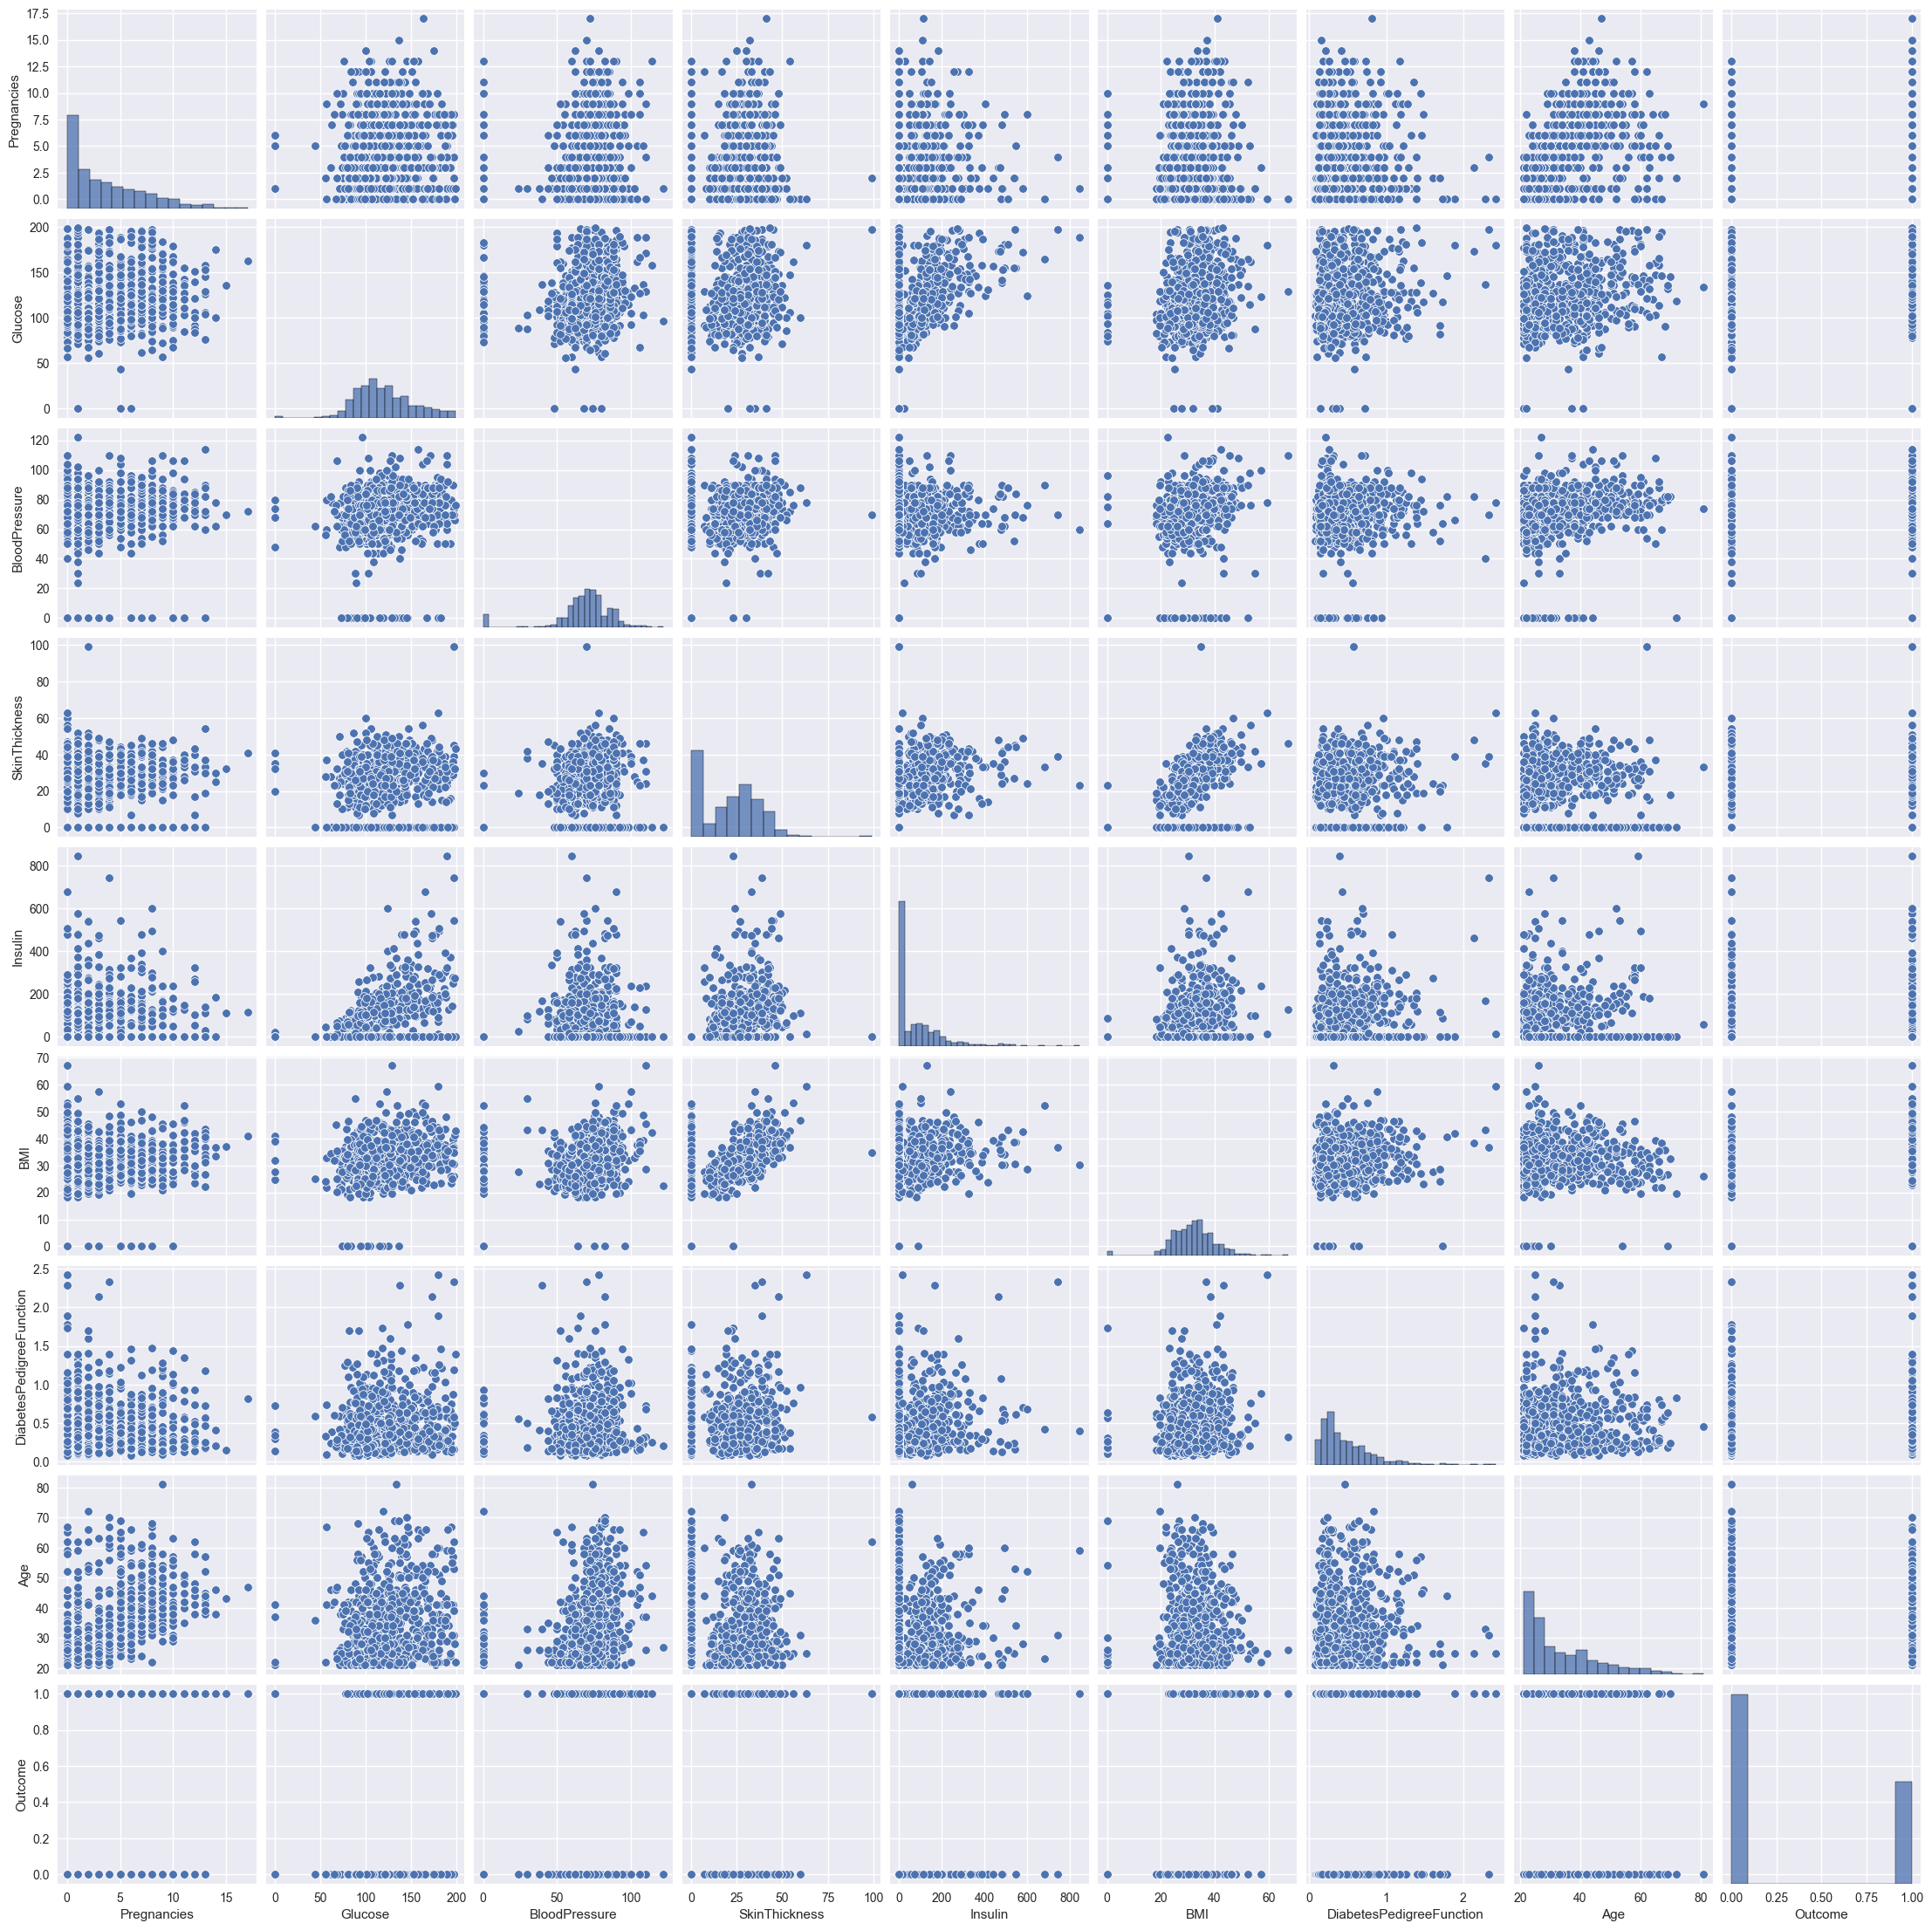

In [39]:
plt.style.use("seaborn")
sns.pairplot(
    data=df
)

<Axes: >

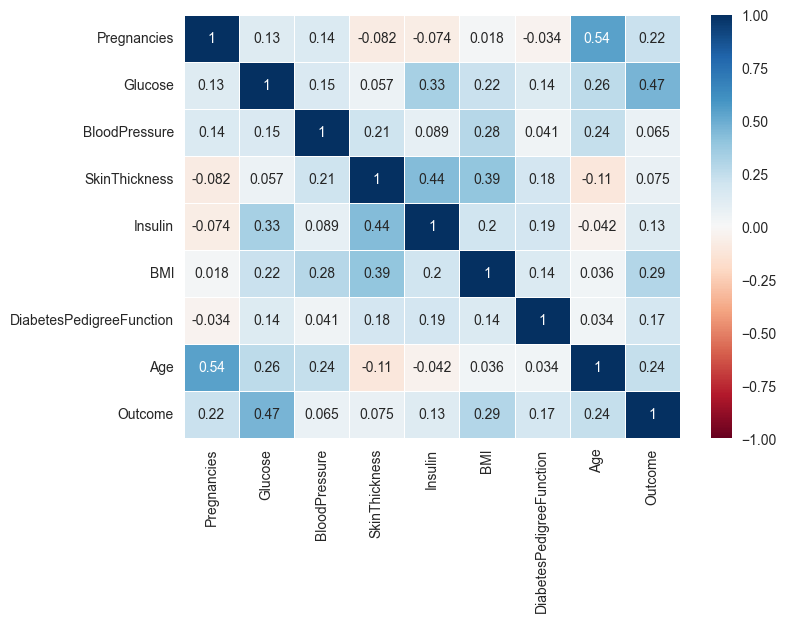

In [40]:
df.corr()

# Graficamos la matriz de correlación con un gráfico de calor
sns.heatmap(
    data=df.corr(),
    annot=True,
    # Ponemos los colores de calor entre azul y rojo
    cmap="RdBu",
    linewidths=0.5,
    vmin=-1,
    vmax=1
)

En este caso, contamos con 8 características, para tratar de predecir si una persona va a tenere diavetes (Variable "Outcome")

### **Entrenamiento del modelo**

In [41]:
# Primero que todo, separamso el dataset en variables independientes y dependientes:

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [42]:
# Luego, importamos el train_test_split de sklearn:
from sklearn.model_selection import train_test_split

# Y realizamos la separación de los datos en conjuntos de entrenamiento y prueba:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [43]:
# Vemos los tamaños de los conjuntos de datos:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((537, 8), (231, 8), (537,), (231,))

In [44]:
# Ahora importamos la clase DecisionTreeClassifier de sklearn:
from sklearn.ensemble import RandomForestClassifier

# Declaramos el modelo:
forest = RandomForestClassifier(n_estimators=10, random_state=42)

In [45]:
# Entrenamo el modelo:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [46]:
# Calculamos las predicciones en el conjunto de entrenamiento y en el conjunto de prueba:

y_train_pred_forest = forest.predict(X_train)
y_test_pred_forest = forest.predict(X_test)

### **Evaluación del Modelo:**

In [47]:
# Primero, importamos la función accuracy_score de sklearn:
from sklearn.metrics import accuracy_score

# Calculamos el accuracy en el conjunto de entrenamiento y en el conjunto de prueba:
train_accuracy_forest = accuracy_score(y_train, y_train_pred_forest)
test_accuracy_forest = accuracy_score(y_test, y_test_pred_forest)

# Imprimimos los resultados:
print("Accuracy en Train: ", train_accuracy_forest)
print("Accuracy en Test: ", test_accuracy_forest)

Accuracy en Train:  0.9888268156424581
Accuracy en Test:  0.7402597402597403


In [48]:
# Revisamos el feature importance del modelo:
feature_importances_df = pd.DataFrame(
    {"Feature":list(X.columns), 
     "Importance":forest.feature_importances_}
).sort_values("Importance", ascending=False)

feature_importances_df

Feature  Importance
1                   Glucose    0.262196
5                       BMI    0.173489
7                       Age    0.149754
6  DiabetesPedigreeFunction    0.119033
2             BloodPressure    0.086000
0               Pregnancies    0.078183
4                   Insulin    0.074285
3             SkinThickness    0.057060

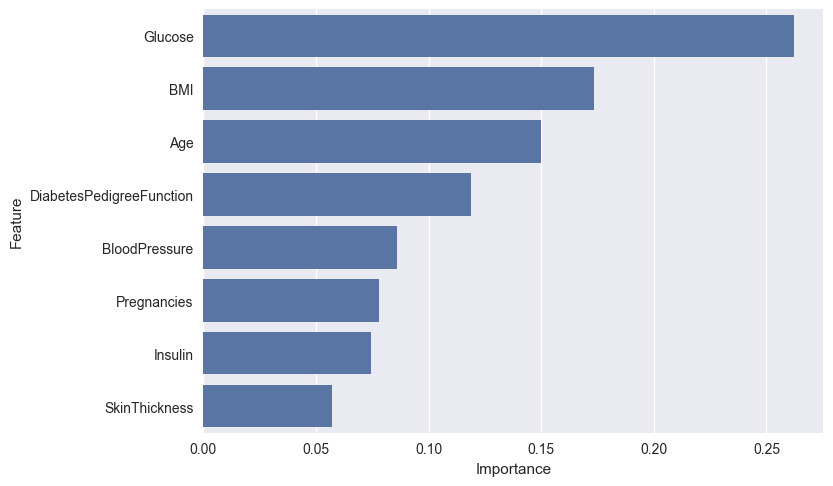

In [49]:
# Ahora, graficamos el feature importance del modelo:
sns.barplot(
    data=feature_importances_df,
    x="Importance",
    y="Feature",
    orient='h'
)
plt.show()

### **Matriz de confusión y métricas**

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred_forest)

print("Matriz de confusión:' \n", cm)

Matriz de confusión:' 
 [[123  28]
 [ 32  48]]


In [55]:
from sklearn.metrics import classification_report

print("Reporte de clasificación: \n", classification_report(y_test, y_test_pred_forest))

Reporte de clasificación: 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       151
           1       0.63      0.60      0.62        80

    accuracy                           0.74       231
   macro avg       0.71      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

